In [ ]:
import pandas as pd
import math 
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('../src')
import utils_explore as ue

data = ue.all_bets()

In [186]:
# select interesting authors and the most recent time (~6 month)
authors = ['chaplygin', 'falcao1984', 'teplofevralya', 'nvaluev', 'ostapbender']
df = data[(data.author.isin(authors)) & (data['placed-date']>=datetime.date(2019, 5, 1))]

In [187]:
#group data by weeks, then add amount ratio for every author, 
# then calculate count and success rate with this new amounts
df_weekly = ue.calc_win_rate(df, 'W')
df_amount = pd.DataFrame({'author' : authors, 'ratio' : [2, 2, 1, 2, 2]}) # authors = ['chaplygin', 'falcao1984', 'teplofevralya']
df_weekly = df_weekly.merge(df_amount, on='author', how="left").drop(columns=['author','success_rate','return'])
df_weekly['count'] = df_weekly['count'] * df_weekly['ratio']
df_weekly['win'] = df_weekly['win'] * df_weekly['ratio']
#summarize on weeks
df_weekly = df_weekly.groupby(by='placed-date').agg('sum')
df_weekly['success_rate'] = df_weekly['win'] / df_weekly['count'] * 100
df_weekly.reset_index(inplace=True)
df_weekly

,placed-date,count,win,ratio,success_rate
0,2019-04-29/2019-05-05,26.0,17.11,5,65.807692
1,2019-05-06/2019-05-12,37.0,-3.02,5,-8.162162
2,2019-05-13/2019-05-19,30.0,0.76,5,2.533333
3,2019-05-20/2019-05-26,31.0,2.07,5,6.677419
4,2019-05-27/2019-06-02,39.0,5.53,9,14.179487
5,2019-06-03/2019-06-09,62.0,20.82,7,33.580645
6,2019-06-10/2019-06-16,37.0,1.27,7,3.432432
7,2019-06-17/2019-06-23,41.0,-4.32,5,-10.536585
8,2019-06-24/2019-06-30,20.0,5.82,4,29.100000
9,2019-07-01/2019-07-07,33.0,-1.42,7,-4.303030


In [188]:
# size of each stake depends on budget
# the budget spreads with respekt to amount ratio
budget = 800
single_stake = budget / df_weekly['count'].mean()
df_amount['stake'] = df_amount['ratio'] * single_stake
df_amount

,author,ratio,stake
0,chaplygin,2,41.651706
1,falcao1984,2,41.651706
2,teplofevralya,1,20.825853
3,nvaluev,2,41.651706
4,ostapbender,2,41.651706


In [189]:
#simple outcome 
df_weekly['fin-result'] = df_weekly['win'] * single_stake
df_weekly['fin-result'].sum()

2289.1777378815086

In [190]:
tax = 0.95 #taxes
bets_inaccuracy = 0.9 #my odds are often differ (they are smaller) 
round(df_weekly['fin-result'].sum() * tax * bets_inaccuracy, 1)

1957.2

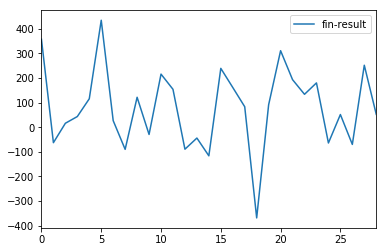

In [191]:
#detailed
df_weekly[['placed-date','fin-result']].plot()

In [192]:
df_weekly['fin-result'].describe()

count     29.000000
mean      78.937163
std      165.317553
min     -367.992819
25%      -44.150808
50%       82.886894
75%      179.518851
max      433.594255
Name: fin-result, dtype: float64

In [193]:
#fail analysis... no pattern
#df[(df['placed-date'] >= datetime.date(2019,9,2)) & (df['placed-date'] <= datetime.date(2019,9,8))]

In [195]:
#MONTHLY
df_4w = df_weekly.groupby(df_weekly.index / 4).agg({'fin-result':'sum'})
df_4w

,fin-result
0,352.373429
1,485.242370
2,460.251346
3,-11.245961
4,-33.321364
5,815.540395
6,168.272890
7,52.064632


In [196]:
df_4w.describe()

,fin-result
count,8.000000
mean,286.147217
std,296.114376
min,-33.321364
25%,36.236984
50%,260.323160
75%,466.499102
max,815.540395


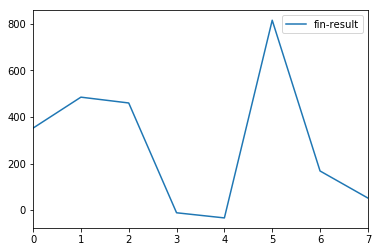

In [197]:
df_4w.plot()